## Wrangling the Billboard Top 100

Consider the data in `billboard.csv` containing every song to appear on the weekly Billboard Top 100 chart since 1958, up through the middle of 2021. Each row of this data corresponds to a single song in a single week. For our purposes, the relevant columns here are:

- **performer:** who performed the song
- **song:** the title of the song
- **year:** year (1958 to 2021)
- **week:** chart week of that year (1, 2, etc)
- **week_position:** what position that song occupied that week on the Billboard top 100 chart.

Use your skills in data wrangling and plotting to answer the following three questions.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('billboard.csv')
df

,Unnamed: 0,url,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart,year,week
0,1,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4,1965,29
1,2,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5,1965,30
2,3,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6,1965,31
3,4,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7,1965,32
4,5,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8,1965,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327890,327891,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018,42
327891,327892,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13,1977,21
327892,327893,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13,1981,21
327893,327894,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13,1973,39


## Part A: Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.

(Note: you'll want to use both performer and song in any group_by operations, to account for the fact that multiple unique songs can share the same title.)

In [7]:
song_count = df.groupby(['performer','song']).size().reset_index(name='count')
song_count
top_song_count = song_count.sort_values(by='count', ascending=False)
top_10_songs = top_song_count.head(10)
top_10_songs




,performer,song,count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


## Part B_: Is the "musical diversity" of the Billboard Top 100 changing over time?  Let's find out.  We'll measure the musical diversity of given year as _the number of unique songs that appeared in the Billboard Top 100 that year._  Make a line graph that plots this measure of musical diversity over the years.  The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year.  For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years.   Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.  
There are number of ways to accomplish the data wrangling here.  For example, you could use two distinct sets of data-wrangling steps.  The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year.  The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, _irrespective of how many times_ it had appeared.

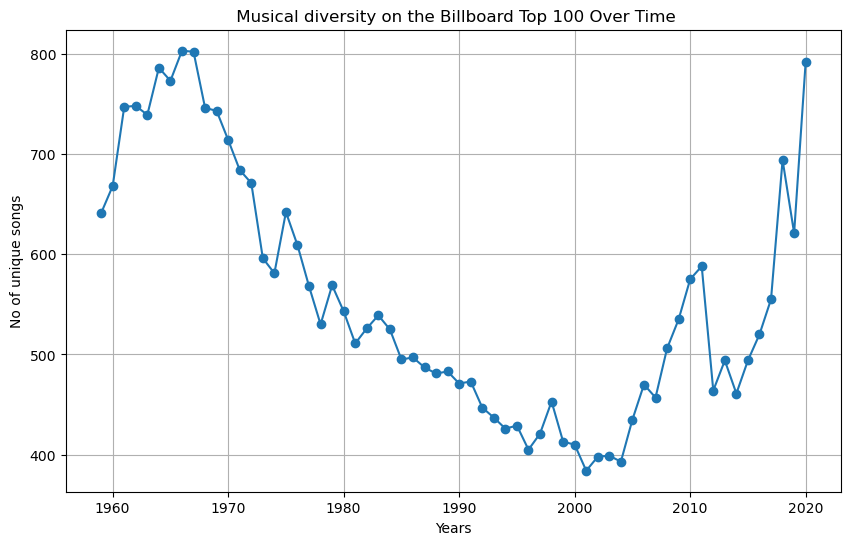

In [9]:
filtered_df = df[(df['year'] > 1958) & (df['year'] < 2021)]
filtered_df

diversity_per_year = filtered_df.groupby('year')['song'].nunique().reset_index(name='unique_songs')

plt.figure(figsize=(10,6))
plt.plot(diversity_per_year['year'], diversity_per_year['unique_songs'], marker='o')
plt.xlabel('Years')
plt.ylabel('No of unique songs')
plt.title(' Musical diversity on the Billboard Top 100 Over Time')
plt.grid(True)
plt.show()


## Part C Let's define a "ten-week hit" as a single song that appeared on the Billboard Top 100 for at least ten weeks.  There are 19 artists in U.S. musical history since 1958 who have had _at least 30 songs_ that were "ten-week hits."  Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career.   Give the plot an informative caption in which you explain what is shown.

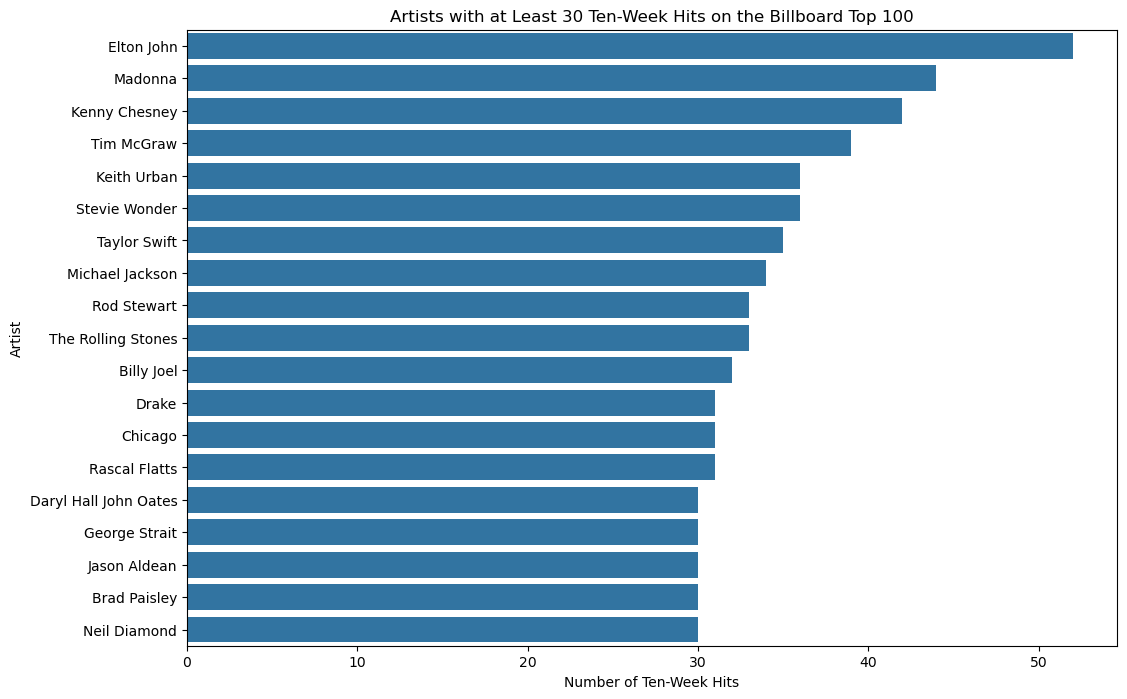

In [11]:
import seaborn as sns

# Group by performer and song, then count the number of weeks each song spent on the chart
ten_week_hits = df.groupby(['performer', 'song']).size().reset_index(name='week_count')

# Filter for songs that were on the chart for at least 10 weeks
ten_week_hits = ten_week_hits[ten_week_hits['week_count'] >= 10]

# Group by performer and count the number of ten-week hits per artist
artist_hits = ten_week_hits.groupby('performer').size().reset_index(name='ten_week_hits')

# Filter for artists with at least 30 ten-week hits
top_artists = artist_hits[artist_hits['ten_week_hits'] >= 30]

# Sort by the number of ten-week hits and plot
plt.figure(figsize=(12, 8))
sns.barplot(x='ten_week_hits', y='performer', data=top_artists.sort_values('ten_week_hits', ascending=False))
plt.xlabel('Number of Ten-Week Hits')
plt.ylabel('Artist')
plt.title('Artists with at Least 30 Ten-Week Hits on the Billboard Top 100')
plt.show()